In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([-5, -5])
mean_2 = np.array([7, 7])

In [3]:
cov_1 = np.array([[1, 2], 
                  [3, 1]])
cov_2 = np.array([[1, 5], 
                  [5, 1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 200)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 200)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_23608\846001253.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, 200)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_23608\846001253.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, 200)


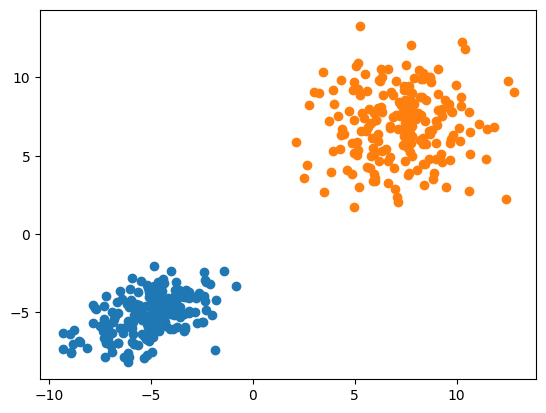

In [5]:
plt.scatter(dist_1[:, 0], dist_1[:, 1])
plt.scatter(dist_2[:, 0], dist_2[:, 1])

In [6]:
dist_1.shape

(200, 2)

In [7]:
dataset = np.zeros((400, 3))

In [8]:
dataset[:200, :2] = dist_1
dataset[200:, :2] = dist_2

dataset[200:, -1] = 1

In [9]:
dataset[199]

array([-6.02542831, -5.92294515,  0.        ])

In [10]:
np.random.shuffle(dataset)

In [11]:
dataset[:10]

array([[-2.78789118, -4.08559703,  0.        ],
       [ 5.94445394,  7.74729795,  1.        ],
       [-8.77576823, -6.11589537,  0.        ],
       [-4.29439853, -5.08139201,  0.        ],
       [ 7.63717347,  5.4699686 ,  1.        ],
       [-4.60533799, -6.20717538,  0.        ],
       [-5.86412599, -6.41602134,  0.        ],
       [ 9.96810539,  9.52547172,  1.        ],
       [ 7.74304833,  7.82516122,  1.        ],
       [-4.54689821, -4.71542987,  0.        ]])

In [12]:
split = 0.9
X_train = dataset[:int(split * dataset.shape[0]), : -1]
Y_train = dataset[:int(split * dataset.shape[0]), -1]

X_test = dataset[int(split * dataset.shape[0]):, : -1]
Y_test = dataset[int(split * dataset.shape[0]):, -1]

In [13]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(360, 2) (360,) (40, 2) (40,)


In [14]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train.shape)

(360, 3)


In [15]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test.shape)

(40, 3)


In [16]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [17]:
def hypothesis(X, weight):
    return sigmoid(np.dot(X, weight))

In [18]:
def loss(X, Y, weight):
    pred = hypothesis(X, weight)
    loss = np.mean(Y * np.log(pred) + (1 - Y) * np.log(1 - pred))
    return -1 * loss

In [19]:
def gradient(X, Y, weight):
    pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - pred))
    return grad/X.shape[0]

In [22]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    epochs = 1000
    lr_rate = 0.03
    list_loss = []
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        list_loss.append(loss(X, Y, weights))
        print(f'On: {i}', end = '\r')
        weights = weights + (lr_rate * grad)
    return weights, list_loss

In [23]:
weights, list_loss = gradient_descent(X_train, Y_train)

In [26]:
list_loss[:10]

[0.6931471805599453,
 0.29066428963332896,
 0.19042605732587067,
 0.14448672239868637,
 0.11760879468435559,
 0.09977733696197152,
 0.08699904547345617,
 0.07734966918277537,
 0.06978114163757344,
 0.06367116153759347]

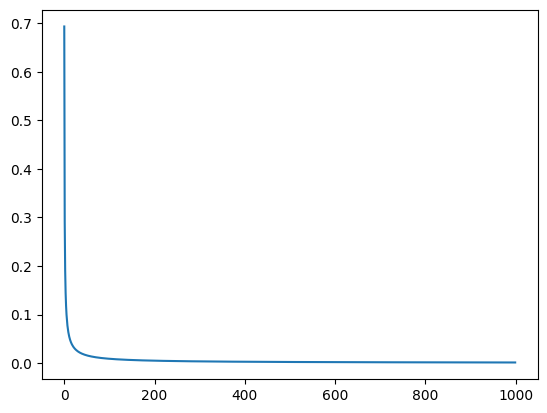

In [27]:
plt.plot(list_loss)

In [28]:
weights

array([-0.08249902,  0.72604767,  0.75809846])

In [29]:
x1 = np.arange(-10, 15)

In [30]:
x2 = -(weights[1] * x1 + weights[0])/weights[2]

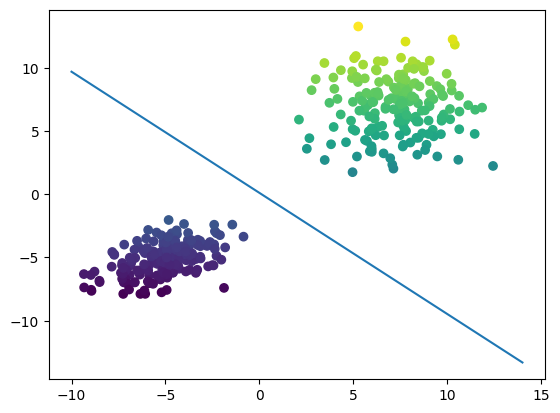

In [33]:
plt.scatter(X_train[:, 1], X_train[:, 2], c = X_train[:, -1])
plt.plot(x1, x2)

In [37]:
pred = []

for i in range(X_test.shape[0]):
    y_hat = hypothesis(X_test[i], weights)
#     pred.append(y_hat)
    print(y_hat, Y_test[i])
    if y_hat >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

0.0004928331520164376 0.0
0.9996647137101872 1.0
0.999557011357406 1.0
0.00013729339556658876 0.0
0.0015780772137834337 0.0
0.9999945417967611 1.0
0.9999999263163796 1.0
0.9999998964764295 1.0
7.180270281270314e-06 0.0
0.9982886717633768 1.0
0.0016458081255221696 0.0
0.002577567488980523 0.0
0.001724823411145017 0.0
4.5182190195752426e-05 0.0
0.9999841253924641 1.0
0.0014066531566796312 0.0
0.0009105828085146016 0.0
0.999888866140671 1.0
0.9999795235810854 1.0
0.00013430381833979955 0.0
2.073735880906545e-05 0.0
0.9999915136942585 1.0
0.9997045048442667 1.0
0.00026565066136797144 0.0
4.5728519900863436e-05 0.0
0.0001280846568051444 0.0
1.0088649894168956e-05 0.0
0.00025774326101783967 0.0
0.9999986312816596 1.0
0.9998035071833822 1.0
0.0017947286149539031 0.0
0.9997582825800517 1.0
0.9999959941895199 1.0
0.9996923552659885 1.0
0.9999117532278097 1.0
0.9999969622943439 1.0
0.003669041937718319 0.0
0.999192748423889 1.0
0.9997224550405202 1.0
0.002960909222306972 0.0


In [41]:
corr = 0

for i in range(Y_test.shape[0]):
    if pred[i] == Y_test[i]:
        corr += 1
print(corr/Y_test.shape[0])

1.0
